Загружаем все необходимые библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set_theme(color_codes=True)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
%matplotlib inline

Используем данные по жёлтому такси за декабрь 2019 года https://nyc-tlc.s3.amazonaws.com/trip+data/yellow_tripdata_2019-12.csv

Загружаем данные в дата фэйм

In [2]:
df = pd.read_csv('yellow_tripdata_2019-12.csv',low_memory=False)

In [3]:
df.shape

(6896317, 18)

In [4]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2019-12-01 00:26:58,2019-12-01 00:41:45,1.0,4.2,1.0,N,142,116,2.0,14.5,3.0,0.5,0.0,0.0,0.3,18.3,2.5
1,1.0,2019-12-01 00:12:08,2019-12-01 00:12:14,1.0,0.0,1.0,N,145,145,2.0,2.5,0.5,0.5,0.0,0.0,0.3,3.8,0.0
2,1.0,2019-12-01 00:25:53,2019-12-01 00:26:04,1.0,0.0,1.0,N,145,145,2.0,2.5,0.5,0.5,0.0,0.0,0.3,3.8,0.0
3,1.0,2019-12-01 00:12:03,2019-12-01 00:33:19,2.0,9.4,1.0,N,138,25,1.0,28.5,0.5,0.5,10.0,0.0,0.3,39.8,0.0
4,1.0,2019-12-01 00:05:27,2019-12-01 00:16:32,2.0,1.6,1.0,N,161,237,2.0,9.0,3.0,0.5,0.0,0.0,0.3,12.8,2.5


Используем данные по жёлтому такси за январь 2020 года https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2020-01.csv

In [5]:
df_20 = pd.read_csv('yellow_tripdata_2020-01.csv',low_memory=False)

In [6]:
df_20.shape

(6405008, 18)

In [7]:
df_20.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


Объеденяем данные в единый дата фрэйм

In [8]:
df = df.append(df_20)

In [9]:
df.reset_index()

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,0,1.0,2019-12-01 00:26:58,2019-12-01 00:41:45,1.0,4.20,1.0,N,142,116,2.0,14.50,3.00,0.5,0.0,0.00,0.3,18.30,2.5
1,1,1.0,2019-12-01 00:12:08,2019-12-01 00:12:14,1.0,0.00,1.0,N,145,145,2.0,2.50,0.50,0.5,0.0,0.00,0.3,3.80,0.0
2,2,1.0,2019-12-01 00:25:53,2019-12-01 00:26:04,1.0,0.00,1.0,N,145,145,2.0,2.50,0.50,0.5,0.0,0.00,0.3,3.80,0.0
3,3,1.0,2019-12-01 00:12:03,2019-12-01 00:33:19,2.0,9.40,1.0,N,138,25,1.0,28.50,0.50,0.5,10.0,0.00,0.3,39.80,0.0
4,4,1.0,2019-12-01 00:05:27,2019-12-01 00:16:32,2.0,1.60,1.0,N,161,237,2.0,9.00,3.00,0.5,0.0,0.00,0.3,12.80,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13301320,6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.0,0.00,0.3,21.14,0.0
13301321,6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.0,12.24,0.3,62.46,0.0
13301322,6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.0,0.00,0.3,51.90,0.0
13301323,6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.0,0.00,0.3,30.22,0.0


In [10]:
df.shape

(13301325, 18)

In [11]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2019-12-01 00:26:58,2019-12-01 00:41:45,1.0,4.2,1.0,N,142,116,2.0,14.5,3.0,0.5,0.0,0.0,0.3,18.3,2.5
1,1.0,2019-12-01 00:12:08,2019-12-01 00:12:14,1.0,0.0,1.0,N,145,145,2.0,2.5,0.5,0.5,0.0,0.0,0.3,3.8,0.0
2,1.0,2019-12-01 00:25:53,2019-12-01 00:26:04,1.0,0.0,1.0,N,145,145,2.0,2.5,0.5,0.5,0.0,0.0,0.3,3.8,0.0
3,1.0,2019-12-01 00:12:03,2019-12-01 00:33:19,2.0,9.4,1.0,N,138,25,1.0,28.5,0.5,0.5,10.0,0.0,0.3,39.8,0.0
4,1.0,2019-12-01 00:05:27,2019-12-01 00:16:32,2.0,1.6,1.0,N,161,237,2.0,9.0,3.0,0.5,0.0,0.0,0.3,12.8,2.5


In [12]:
df.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

Проверяем данные на наличие некорректных данных

In [13]:
df[df['VendorID'].isnull()]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
6845299,NaN,2019-12-01 11:29:00,2019-12-01 12:17:00,NaN,18.21,NaN,NaN,107,76,NaN,29.53,2.75,0.5,0.0,6.12,0.3,39.20,0.0
6845300,NaN,2019-12-01 11:40:42,2019-12-01 12:00:04,NaN,7.92,NaN,NaN,263,182,NaN,30.33,2.75,0.0,0.0,6.12,0.3,39.50,0.0
6845301,NaN,2019-12-01 11:00:00,2019-12-01 11:37:00,NaN,9.38,NaN,NaN,22,211,NaN,33.56,2.75,0.5,0.0,0.00,0.3,37.11,0.0
6845302,NaN,2019-12-01 11:43:00,2019-12-01 12:16:00,NaN,11.39,NaN,NaN,121,90,NaN,42.23,2.75,0.5,0.0,6.12,0.3,51.90,0.0
6845303,NaN,2019-12-01 11:01:35,2019-12-01 11:17:58,NaN,3.01,NaN,NaN,75,163,NaN,21.18,2.75,0.0,0.0,0.00,0.3,24.23,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.0,0.00,0.3,21.14,0.0
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.0,12.24,0.3,62.46,0.0
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.0,0.00,0.3,51.90,0.0
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.0,0.00,0.3,30.22,0.0


Удаляем строчки в дата фрэйме, которые отсутствуют

In [14]:
df.dropna(axis=0, inplace=True)
df.reset_index()

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,0,1.0,2019-12-01 00:26:58,2019-12-01 00:41:45,1.0,4.20,1.0,N,142,116,2.0,14.5,3.0,0.5,0.00,0.0,0.3,18.30,2.5
1,1,1.0,2019-12-01 00:12:08,2019-12-01 00:12:14,1.0,0.00,1.0,N,145,145,2.0,2.5,0.5,0.5,0.00,0.0,0.3,3.80,0.0
2,2,1.0,2019-12-01 00:25:53,2019-12-01 00:26:04,1.0,0.00,1.0,N,145,145,2.0,2.5,0.5,0.5,0.00,0.0,0.3,3.80,0.0
3,3,1.0,2019-12-01 00:12:03,2019-12-01 00:33:19,2.0,9.40,1.0,N,138,25,1.0,28.5,0.5,0.5,10.00,0.0,0.3,39.80,0.0
4,4,1.0,2019-12-01 00:05:27,2019-12-01 00:16:32,2.0,1.60,1.0,N,161,237,2.0,9.0,3.0,0.5,0.00,0.0,0.3,12.80,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13184861,6339562,2.0,2020-01-31 23:38:07,2020-01-31 23:52:21,1.0,2.10,1.0,N,163,246,1.0,11.0,0.5,0.5,2.96,0.0,0.3,17.76,2.5
13184862,6339563,2.0,2020-01-31 23:00:18,2020-01-31 23:19:18,1.0,2.13,1.0,N,164,79,1.0,13.0,0.5,0.5,3.36,0.0,0.3,20.16,2.5
13184863,6339564,2.0,2020-01-31 23:24:22,2020-01-31 23:40:39,1.0,2.55,1.0,N,79,68,1.0,12.5,0.5,0.5,3.26,0.0,0.3,19.56,2.5
13184864,6339565,2.0,2020-01-31 23:44:22,2020-01-31 23:54:00,1.0,1.61,1.0,N,100,142,2.0,8.5,0.5,0.5,0.00,0.0,0.3,12.30,2.5


In [15]:
df['VendorID'] = df['VendorID'].astype(int)
df['passenger_count'] = df['passenger_count'].astype(int)
df['RatecodeID'] = df['RatecodeID'].astype(int)
df['payment_type'] = df['payment_type'].astype(int)

In [16]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-12-01 00:26:58,2019-12-01 00:41:45,1,4.2,1,N,142,116,2,14.5,3.0,0.5,0.0,0.0,0.3,18.3,2.5
1,1,2019-12-01 00:12:08,2019-12-01 00:12:14,1,0.0,1,N,145,145,2,2.5,0.5,0.5,0.0,0.0,0.3,3.8,0.0
2,1,2019-12-01 00:25:53,2019-12-01 00:26:04,1,0.0,1,N,145,145,2,2.5,0.5,0.5,0.0,0.0,0.3,3.8,0.0
3,1,2019-12-01 00:12:03,2019-12-01 00:33:19,2,9.4,1,N,138,25,1,28.5,0.5,0.5,10.0,0.0,0.3,39.8,0.0
4,1,2019-12-01 00:05:27,2019-12-01 00:16:32,2,1.6,1,N,161,237,2,9.0,3.0,0.5,0.0,0.0,0.3,12.8,2.5


In [17]:
df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,13184866.00,13184866.00,13184866.00,13184866.00,13184866.00,13184866.00,13184866.00,13184866.00,13184866.00,13184866.00,13184866.00,13184866.00,13184866.00,13184866.00,13184866.00
mean,1.67,1.53,2.90,1.06,164.42,162.33,1.29,12.99,1.10,0.49,2.24,0.36,0.30,19.01,2.30
std,0.47,1.16,6.51,0.88,65.68,70.03,0.48,110.43,1.25,0.07,2.82,1.72,0.03,110.77,0.71
min,1.00,0.00,-23.01,1.00,1.00,1.00,1.00,-1472.00,-27.00,-0.50,-200.80,-40.50,-0.30,-1472.80,-2.50
25%,1.00,1.00,0.95,1.00,132.00,113.00,1.00,6.50,0.00,0.50,0.00,0.00,0.30,11.27,2.50
50%,2.00,1.00,1.60,1.00,162.00,162.00,1.00,9.50,0.50,0.50,1.95,0.00,0.30,14.75,2.50
75%,2.00,2.00,2.94,1.00,234.00,234.00,2.00,14.50,2.50,0.50,2.96,0.00,0.30,20.30,2.50
max,2.00,9.00,19130.18,99.00,265.00,265.00,5.00,398468.38,113.01,30.80,1100.00,910.50,0.30,398471.20,3.00


Из данного быстрого анализа видно следующее:
* средняя цена на поездку составляет в районе 19 долларов,
* среднее расстояние поездки на такси составляет 2,9 мили или 4,66 км
* средние чаевые за поездку 2,24 доллара
* средний пассажиро поток за поездку 1,5 человека

In [18]:
df['VendorID'].value_counts().to_frame()

,VendorID
2,8807225
1,4377641


In [19]:
df['RatecodeID'].value_counts().to_frame()

,RatecodeID
1,12724048
2,340384
5,77172
3,31861
4,10447
99,871
6,83


При проверке тарифов обнаружился некорректний код 99, который не задокументирован и является ошибочным

In [20]:
df[df['RatecodeID']==99]


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
60454,2,2019-12-01 11:52:18,2019-12-01 12:06:00,1,1.37,99,N,100,161,2,10.00,0.0,0.5,0.0,0.0,0.3,13.30,2.5
61760,2,2019-12-01 11:33:00,2019-12-01 11:36:20,1,0.45,99,N,41,166,2,4.50,0.0,0.5,0.0,0.0,0.3,5.30,0.0
75995,2,2019-12-01 13:17:21,2019-12-01 13:46:37,1,0.00,99,N,68,162,2,2.50,0.8,0.5,0.0,0.0,0.0,6.30,2.5
105802,2,2019-12-01 15:07:31,2019-12-01 15:18:27,2,1.94,99,N,137,141,2,9.00,0.0,0.5,0.0,0.0,0.3,12.30,2.5
111425,1,2019-12-01 15:00:22,2019-12-01 15:00:22,0,0.00,99,N,264,264,1,90.97,0.0,0.5,0.0,0.0,0.3,91.77,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6182592,2,2020-01-31 12:02:49,2020-01-31 12:12:40,1,1.59,99,N,238,236,2,8.50,0.0,0.5,0.0,0.0,0.3,11.80,2.5
6251214,2,2020-01-31 17:38:22,2020-01-31 17:38:28,2,0.00,99,N,132,132,2,2.50,1.0,0.5,0.0,0.0,0.3,4.30,0.0
6252370,2,2020-01-31 17:16:41,2020-01-31 17:19:23,1,0.58,99,N,237,236,2,4.00,1.0,0.5,0.0,0.0,0.3,8.30,2.5
6289167,2,2020-01-31 20:48:48,2020-01-31 20:54:19,1,0.00,99,N,193,193,2,2.50,1.3,0.5,0.0,0.0,0.0,4.30,0.0


Общее число поездок с кодом 99 составляет 0,000065% что является ничтожным и мы можем удалить эти строки

In [21]:
df = df[df.RatecodeID != 99]

In [22]:
df.corr()['total_amount'].sort_values()

congestion_surcharge    -0.017889
payment_type            -0.017778
mta_tax                 -0.010933
DOLocationID            -0.010264
PULocationID            -0.009600
extra                    0.001200
passenger_count          0.001442
VendorID                 0.001792
improvement_surcharge    0.014220
trip_distance            0.067436
RatecodeID               0.073765
tolls_amount             0.087085
tip_amount               0.093103
fare_amount              0.999362
total_amount             1.000000
Name: total_amount, dtype: float64

<AxesSubplot:xlabel='RatecodeID', ylabel='total_amount'>

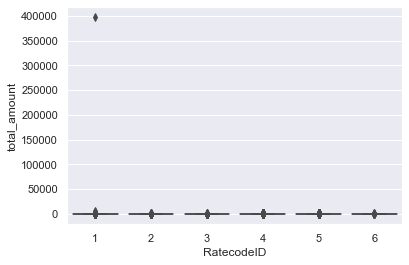

In [96]:
sns.boxplot(x="RatecodeID", y="total_amount", data=df)

На бокс плоте видно, что данные по категориям неадекватные (зашкаливают за 40 тыс долларов), проведем анализ в каждом разделе тарифа

Анализ общего тарифа

In [23]:
df1 = df[df['RatecodeID']==1]

In [24]:
df1.corr()['total_amount'].sort_values()

payment_type            -0.014144
DOLocationID            -0.007953
PULocationID            -0.005653
congestion_surcharge    -0.005516
VendorID                 0.000127
extra                    0.000218
passenger_count          0.000449
improvement_surcharge    0.011125
mta_tax                  0.012643
tolls_amount             0.048922
tip_amount               0.058046
trip_distance            0.080727
fare_amount              0.999648
total_amount             1.000000
RatecodeID                    NaN
Name: total_amount, dtype: float64

Мы видим слабую корреляцию с другими категориями, возможно это из-за сильно зашумленных данных

<AxesSubplot:xlabel='RatecodeID', ylabel='total_amount'>

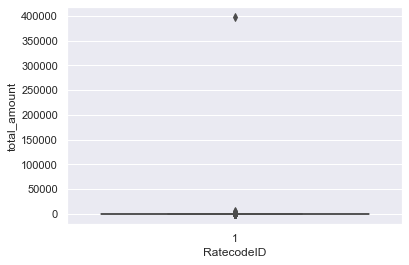

In [50]:
sns.boxplot(x="RatecodeID", y="total_amount", data=df1)

Анализ тарифа в аэропорт JFK

In [25]:
df2 = df[df['RatecodeID']==2]

In [26]:
df2.corr()['total_amount'].sort_values()

payment_type            -0.604269
VendorID                -0.040706
PULocationID            -0.034793
DOLocationID            -0.008687
passenger_count         -0.004649
extra                    0.208852
trip_distance            0.265509
tolls_amount             0.412767
congestion_surcharge     0.427767
tip_amount               0.559996
mta_tax                  0.828271
improvement_surcharge    0.829401
fare_amount              0.840396
total_amount             1.000000
RatecodeID                    NaN
Name: total_amount, dtype: float64

Видим некоторую корреляцию с расстоянием

[Text(0.5, 1.0, 'JFK Airport Rate')]

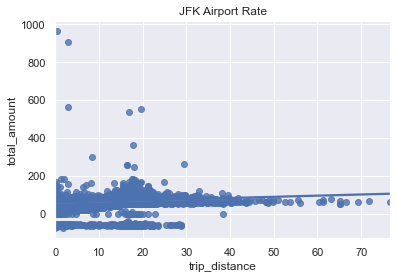

In [27]:
sns.regplot(x="trip_distance", y="total_amount", data=df2).set(title='JFK Airport Rate')

На данном скатер плоте мы видим аномальные поездки которые стоили отрицательную стоимость

<AxesSubplot:xlabel='RatecodeID', ylabel='total_amount'>

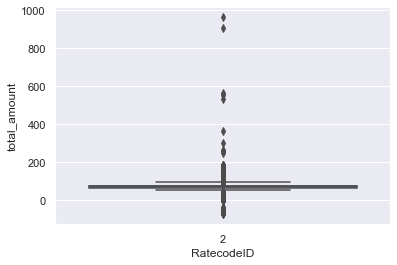

In [51]:
sns.boxplot(x="RatecodeID", y="total_amount", data=df2)

Анализ тарифа поездок в Newark

In [28]:
df3 = df[df['RatecodeID']==3]

In [29]:
df3.corr()['total_amount'].sort_values()

payment_type            -0.559051
DOLocationID            -0.426405
mta_tax                 -0.040751
VendorID                -0.004099
congestion_surcharge     0.001841
extra                    0.020095
passenger_count          0.022018
PULocationID             0.057978
improvement_surcharge    0.412323
tip_amount               0.598534
tolls_amount             0.717904
trip_distance            0.859640
fare_amount              0.932651
total_amount             1.000000
RatecodeID                    NaN
Name: total_amount, dtype: float64

Здесь мы видим сильную корреляцию с пройденным растоянием

[Text(0.5, 1.0, 'Newark Area Rate')]

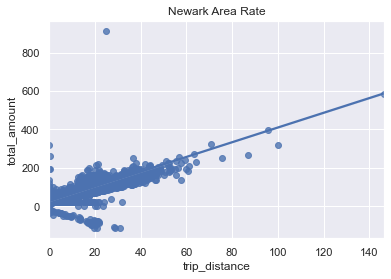

In [30]:
sns.regplot(x="trip_distance", y="total_amount",data=df3).set(title='Newark Area Rate')

На данном скатер плоте мы видим опять аномальные поездки, которые отрицательны

<AxesSubplot:xlabel='RatecodeID', ylabel='total_amount'>

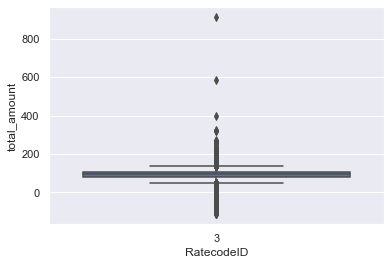

In [52]:
sns.boxplot(x="RatecodeID", y="total_amount", data=df3)

Анализ тарифи в Nassau

In [31]:
df4 = df[df['RatecodeID']==4]

In [32]:
df4.corr()['total_amount'].sort_values()

payment_type            -0.245270
extra                   -0.055114
PULocationID             0.003307
passenger_count          0.013458
DOLocationID             0.044151
congestion_surcharge     0.111266
VendorID                 0.129819
improvement_surcharge    0.175549
mta_tax                  0.199305
tolls_amount             0.391966
tip_amount               0.554566
trip_distance            0.891709
fare_amount              0.977245
total_amount             1.000000
RatecodeID                    NaN
Name: total_amount, dtype: float64

Здесь имеется мощноая корреляция с пройденным растоянием за поездку

[Text(0.5, 1.0, 'Nassau or Westchester Area Rate')]

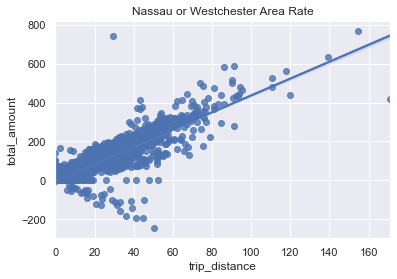

In [33]:
sns.regplot(x="trip_distance", y="total_amount", data=df4).set(title='Nassau or Westchester Area Rate')

также имеются аномальные "отрицательные" поездки

<AxesSubplot:xlabel='RatecodeID', ylabel='total_amount'>

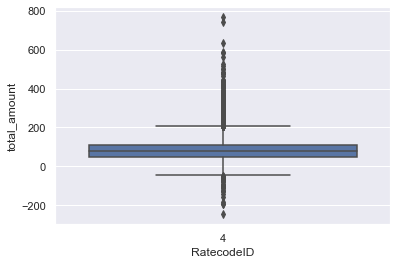

In [53]:
sns.boxplot(x="RatecodeID", y="total_amount", data=df4)

In [34]:
df5 = df[df['RatecodeID']==5]

[Text(0.5, 1.0, 'Negotiated Fare Rate')]

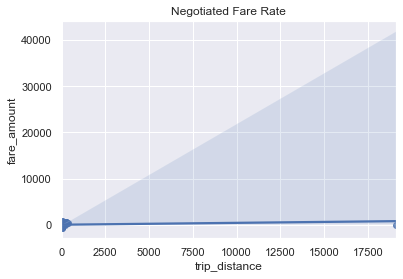

In [35]:
sns.regplot(x="trip_distance", y="fare_amount", data=df5).set(title='Negotiated Fare Rate')

<AxesSubplot:xlabel='RatecodeID', ylabel='total_amount'>

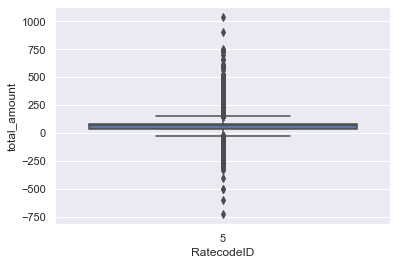

In [54]:
sns.boxplot(x="RatecodeID", y="total_amount", data=df5)

In [36]:
df6 = df[df['RatecodeID']==6]

[Text(0.5, 1.0, 'Group ride')]

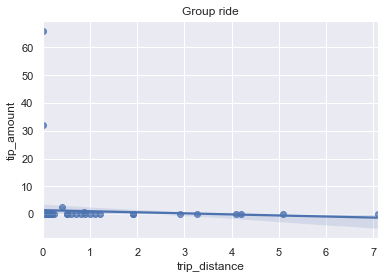

In [37]:
sns.regplot(x="trip_distance", y="tip_amount", data=df6).set(title='Group ride')

<AxesSubplot:xlabel='RatecodeID', ylabel='total_amount'>

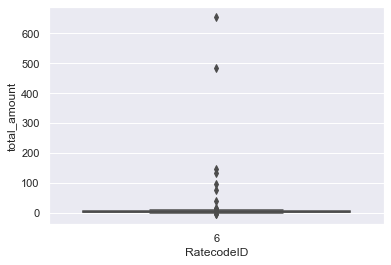

In [56]:
sns.boxplot(x="RatecodeID", y="total_amount", data=df6)

#### Определим аномальные поездки, которые стоят придельно дорого и с малым пробегом

In [138]:
anom=df[df['total_amount']>800]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
445342,1,2019-12-03 10:33:26,2019-12-03 10:34:52,0,13.60,5,N,265,265,3,900.00,0.0,0.00,0.00,0.00,0.3,900.30,0.0
513922,1,2019-12-03 15:00:58,2019-12-03 15:18:04,1,0.20,1,N,238,141,2,6012.50,2.5,0.50,0.00,0.00,0.3,6015.80,2.5
2772387,2,2019-12-12 14:53:37,2019-12-16 09:45:42,1,1.07,1,N,193,193,2,2442.50,0.8,0.50,0.00,0.00,0.0,2443.80,0.0
3078426,2,2019-12-13 16:45:59,2019-12-14 10:04:54,1,0.00,1,N,193,193,2,1961.50,1.0,0.50,0.00,0.00,0.3,1965.80,2.5
3812021,1,2019-12-16 15:37:05,2019-12-16 15:51:05,1,0.00,1,Y,236,237,4,398468.38,2.5,0.32,0.00,0.00,0.0,398471.20,2.5
3818051,1,2019-12-16 15:32:35,2019-12-16 15:32:35,1,0.00,1,Y,236,264,2,844.00,2.5,0.50,0.00,0.00,0.3,847.30,2.5
4274512,2,2019-12-18 12:48:52,2019-12-20 13:34:47,2,1.62,1,N,193,193,2,1472.00,0.0,0.50,0.00,0.00,0.3,1472.80,0.0
471401,2,2020-01-03 19:29:51,2020-01-05 12:28:15,1,8.27,1,N,186,152,2,1238.00,1.0,0.50,0.00,0.00,0.3,1242.30,2.5
530908,1,2020-01-04 05:33:38,2020-01-04 05:34:27,1,0.40,2,N,68,68,3,52.00,2.5,0.50,0.00,910.50,0.3,965.80,2.5
1024290,2,2020-01-06 22:10:47,2020-01-06 22:10:58,1,0.00,5,N,33,33,1,800.00,0.0,0.00,240.09,0.00,0.3,1040.39,0.0


In [142]:
anom=anom[anom['trip_distance']<5]

In [143]:
anom

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
513922,1,2019-12-03 15:00:58,2019-12-03 15:18:04,1,0.20,1,N,238,141,2,6012.50,2.5,0.50,0.00,0.00,0.3,6015.80,2.5
2772387,2,2019-12-12 14:53:37,2019-12-16 09:45:42,1,1.07,1,N,193,193,2,2442.50,0.8,0.50,0.00,0.00,0.0,2443.80,0.0
3078426,2,2019-12-13 16:45:59,2019-12-14 10:04:54,1,0.00,1,N,193,193,2,1961.50,1.0,0.50,0.00,0.00,0.3,1965.80,2.5
3812021,1,2019-12-16 15:37:05,2019-12-16 15:51:05,1,0.00,1,Y,236,237,4,398468.38,2.5,0.32,0.00,0.00,0.0,398471.20,2.5
3818051,1,2019-12-16 15:32:35,2019-12-16 15:32:35,1,0.00,1,Y,236,264,2,844.00,2.5,0.50,0.00,0.00,0.3,847.30,2.5
4274512,2,2019-12-18 12:48:52,2019-12-20 13:34:47,2,1.62,1,N,193,193,2,1472.00,0.0,0.50,0.00,0.00,0.3,1472.80,0.0
530908,1,2020-01-04 05:33:38,2020-01-04 05:34:27,1,0.40,2,N,68,68,3,52.00,2.5,0.50,0.00,910.50,0.3,965.80,2.5
1024290,2,2020-01-06 22:10:47,2020-01-06 22:10:58,1,0.00,5,N,33,33,1,800.00,0.0,0.00,240.09,0.00,0.3,1040.39,0.0
4049543,2,2020-01-21 15:38:33,2020-01-27 13:43:40,1,1.57,1,N,186,152,2,4265.00,0.0,0.50,0.00,0.00,0.3,4268.30,2.5
4268194,2,2020-01-22 16:41:24,2020-01-22 16:49:28,1,0.55,1,N,231,209,1,6.50,1.0,0.50,1100.00,0.00,0.3,1110.80,2.5


#### Также проверим поездки с отрицальеной стоимостью и малым пробегом

In [144]:
anom1=df[df['total_amount']<0]

In [145]:
anom1=anom1[anom1['trip_distance']<1]

In [146]:
anom1

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
1108,2,2019-12-01 00:01:55,2019-12-01 00:03:52,5,0.18,1,N,65,65,3,-3.5,-0.5,-0.5,0.0,0.0,-0.3,-4.8,0.0
1688,2,2019-12-01 00:54:27,2019-12-01 00:56:10,1,0.78,1,N,90,100,3,-4.0,-0.5,-0.5,0.0,0.0,-0.3,-7.8,-2.5
3074,2,2019-12-01 00:48:56,2019-12-01 00:49:32,1,0.00,5,N,239,239,3,-25.0,0.0,0.0,0.0,0.0,-0.3,-27.8,-2.5
3203,2,2019-12-01 00:40:28,2019-12-01 00:43:56,3,0.56,1,N,161,230,4,-4.5,-0.5,-0.5,0.0,0.0,-0.3,-8.3,-2.5
3430,2,2019-12-01 00:24:33,2019-12-01 00:26:16,1,0.29,1,N,125,114,3,-3.5,-0.5,-0.5,0.0,0.0,-0.3,-7.3,-2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6336939,2,2020-01-31 23:07:27,2020-01-31 23:17:15,1,0.45,1,N,148,148,4,-7.5,-0.5,-0.5,0.0,0.0,-0.3,-11.3,-2.5
6337226,2,2020-01-31 23:07:56,2020-01-31 23:16:16,3,0.72,1,N,137,234,3,-6.5,-0.5,-0.5,0.0,0.0,-0.3,-10.3,-2.5
6338169,2,2020-01-31 23:25:44,2020-01-31 23:29:59,1,0.96,1,N,48,186,4,-5.0,-0.5,-0.5,0.0,0.0,-0.3,-8.8,-2.5
6338894,2,2020-01-31 23:30:03,2020-01-31 23:38:09,1,0.84,1,N,48,186,3,-6.5,-0.5,-0.5,0.0,0.0,-0.3,-10.3,-2.5


In [147]:
df_test=df

In [148]:
df101 = df_test[~df_test.index.isin(anom.index)]

In [149]:
df111 = df101[~df101.index.isin(anom1.index)]

In [153]:
df111[df111['total_amount']<-800]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
4274511,2,2019-12-18 12:48:52,2019-12-20 13:34:47,2,1.62,1,N,193,193,3,-1472.0,0.0,-0.5,0.0,0.0,-0.3,-1472.8,0.0
471400,2,2020-01-03 19:29:51,2020-01-05 12:28:15,1,8.27,1,N,186,152,3,-1238.0,-1.0,-0.5,0.0,0.0,-0.3,-1242.3,-2.5


<AxesSubplot:xlabel='RatecodeID', ylabel='total_amount'>

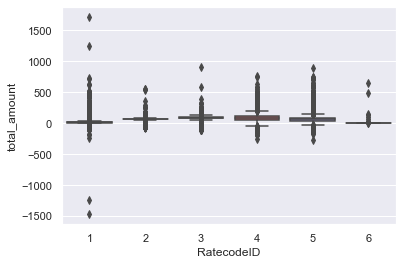

In [152]:
sns.boxplot(x="RatecodeID", y="total_amount", data=df111)

In [154]:
df[df['payment_type']==3]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
57,1,2019-12-01 00:52:16,2019-12-01 01:01:58,1,7.30,1,N,14,66,3,20.5,0.5,0.5,0.0,0.0,0.3,21.8,0.0
448,1,2019-12-01 00:11:39,2019-12-01 00:14:46,1,0.10,1,N,164,234,3,4.0,3.0,0.5,0.0,0.0,0.3,7.8,2.5
564,1,2019-12-01 00:15:52,2019-12-01 00:44:17,1,8.10,1,N,68,168,3,26.0,3.0,0.5,0.0,0.0,0.3,29.8,2.5
918,1,2019-12-01 00:24:29,2019-12-01 00:30:33,1,0.40,1,N,148,144,3,5.5,3.0,0.5,0.0,0.0,0.3,9.3,2.5
1108,2,2019-12-01 00:01:55,2019-12-01 00:03:52,5,0.18,1,N,65,65,3,-3.5,-0.5,-0.5,0.0,0.0,-0.3,-4.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6339217,1,2020-01-31 23:42:27,2020-01-31 23:42:38,1,0.00,1,N,90,90,3,2.5,3.0,0.5,0.0,0.0,0.3,6.3,2.5
6339405,1,2020-01-31 23:54:47,2020-02-01 00:00:52,1,1.00,1,N,79,113,3,6.0,3.0,0.5,0.0,0.0,0.3,9.8,2.5
6339421,1,2020-01-31 23:43:35,2020-01-31 23:49:57,1,0.80,1,N,234,113,3,6.0,3.0,0.5,0.0,0.0,0.3,9.8,2.5
6339436,1,2020-01-31 23:51:05,2020-01-31 23:51:08,1,0.00,1,N,132,132,3,2.5,0.5,0.5,0.0,0.0,0.3,3.8,0.0


In [155]:
df[df['payment_type']==4]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
64,1,2019-12-01 00:05:29,2019-12-01 00:10:35,2,0.60,1,N,249,114,4,5.0,3.0,0.5,0.0,0.0,0.3,8.8,2.5
149,1,2019-12-01 00:03:38,2019-12-01 00:12:49,0,0.90,1,N,50,163,4,7.5,3.0,0.5,0.0,0.0,0.3,11.3,2.5
708,2,2019-12-01 00:07:31,2019-12-01 00:24:55,1,5.76,1,N,163,116,4,-20.0,-0.5,-0.5,0.0,0.0,-0.3,-23.8,-2.5
1309,2,2019-12-01 00:09:47,2019-12-01 00:26:51,1,3.93,1,N,229,7,4,-15.5,-0.5,-0.5,0.0,0.0,-0.3,-19.3,-2.5
1403,1,2019-12-01 00:12:53,2019-12-01 00:48:54,1,21.20,1,N,138,22,4,58.5,0.5,0.5,0.0,0.0,0.3,59.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6338772,1,2020-01-31 23:00:14,2020-01-31 23:00:22,1,0.00,1,N,132,132,4,2.5,0.5,0.5,0.0,0.0,0.3,3.8,0.0
6338811,1,2020-01-31 23:48:08,2020-02-01 00:05:30,1,3.60,1,N,114,162,4,14.0,3.0,0.5,0.0,0.0,0.3,17.8,2.5
6338945,2,2020-01-31 23:07:34,2020-01-31 23:10:58,1,0.47,1,N,68,186,4,-4.0,-0.5,-0.5,0.0,0.0,-0.3,-7.8,-2.5
6339428,1,2020-01-31 23:03:50,2020-01-31 23:12:58,2,1.30,1,N,181,25,4,7.5,0.5,0.5,0.0,0.0,0.3,8.8,0.0


### Проверим распределение стоимости поездок

Отсеим цены, которые отрицательны и высокие цены, которые встречаются редко

In [170]:
price=df[df['total_amount']>0]

In [171]:
price=price[price['total_amount']<90]

<AxesSubplot:>

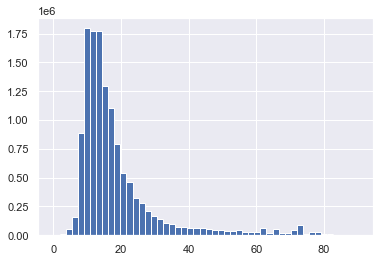

In [172]:
price['total_amount'].hist(bins=50)

Гипотеза о том, что стоимость поездок имеет нормальное распределение (Гауссово распределение) не подтверждается. Разспредедение смещено в лево. Это можно объяснить тем, что большенство стандартных поездок укладыается в цены от 5до 40 долларов, но имеются редкие поездки на дальние расстояние или в аэропорт.
